In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_csv('user_reviews.csv')

In [3]:
dataFrame.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
pd.set_option('display.max_rows', dataFrame.shape[0])

In [5]:
pd.set_option('display.max_columns', dataFrame.shape[0])

In [6]:
dataFrame.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
dataFrame.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [8]:
dataFrame.shape

(64295, 5)

In [9]:
dataFrame.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [10]:
dataFrame = dataFrame.dropna()

In [11]:
dataFrame.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
import nltk

In [20]:
sentiment = SentimentIntensityAnalyzer()

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [26]:
dataFrame['positive'] = [sentiment.polarity_scores(i)['pos'] for i in dataFrame['Translated_Review']]
dataFrame['negative'] = [sentiment.polarity_scores(i)['neg'] for i in dataFrame['Translated_Review']]
dataFrame['neutral'] = [sentiment.polarity_scores(i)['neu'] for i in dataFrame['Translated_Review']]

In [27]:
dataFrame.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,positive,negatime,neutral,negative
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.534,0.0,0.466,0.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.519,0.0,0.481,0.0
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.451,0.0,0.549,0.0
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.677,0.0,0.323,0.0
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.808,0.0,0.192,0.0


In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


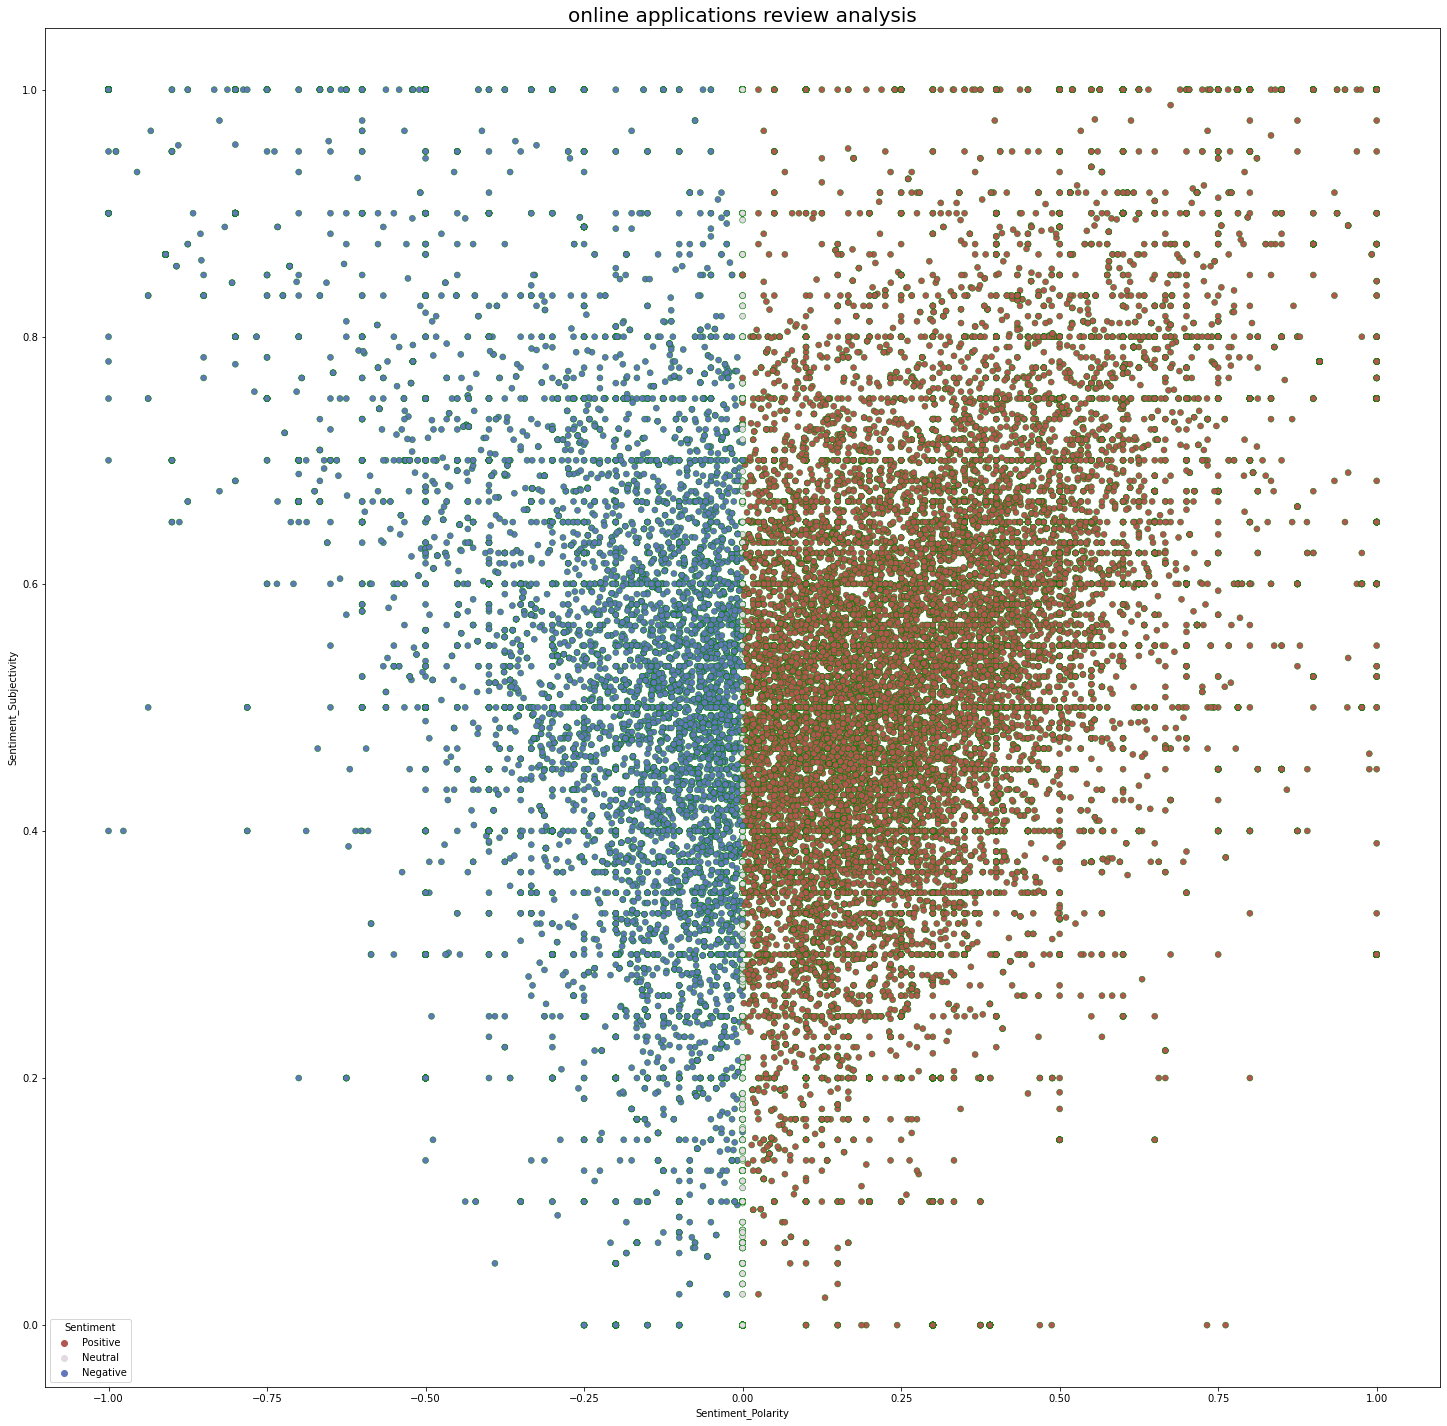

In [31]:
plt.figure(figsize = (25, 25))
sns.scatterplot(dataFrame['Sentiment_Polarity'], dataFrame['Sentiment_Subjectivity'], 
                hue = dataFrame['Sentiment'], edgecolor = 'green', palette = 'twilight_shifted_r')
plt.title('online applications review analysis', fontsize = 20)
plt.show()